In [1]:
#1 importar liberias

In [1]:

import os
import pandas as pd
import math as mt
import numpy as np


In [2]:
#LIBRERIAS PARA ANALISIS DE EEG

    #PARA GRAFICAS INTERACTIVAS
%matplotlib qt


    #PARA PROCESAMIENTOS DATOS EEG
import mne

In [3]:
#2 Lectura de los archivos en formato .BDF 
    #se excluyen las informacion de los canales de aceleracion en los X, Y, Z

In [3]:
prueba = mne.io.read_raw_bdf(r"C:\Users\jarv_\Documents\OpenBCI_GUI\Recordings\OpenBCI-BDF-2023-01-24_11-03-00.bdf", eog=None, misc=None, units = 'uV' ,infer_types=True,exclude=['Accel X','Accel Y','Accel Z'], preload = True)


Extracting EDF parameters from C:\Users\jarv_\Documents\OpenBCI_GUI\Recordings\OpenBCI-BDF-2023-01-24_11-03-00.bdf...
BDF file detected
Channel 'EEG 1' recognized as type EEG (renamed to '1').
Channel 'EEG 2' recognized as type EEG (renamed to '2').
Channel 'EEG 3' recognized as type EEG (renamed to '3').
Channel 'EEG 4' recognized as type EEG (renamed to '4').
Channel 'EEG 5' recognized as type EEG (renamed to '5').
Channel 'EEG 6' recognized as type EEG (renamed to '6').
Channel 'EEG 7' recognized as type EEG (renamed to '7').
Channel 'EEG 8' recognized as type EEG (renamed to '8').
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 154999  =      0.000 ...   619.996 secs...


In [4]:
prueba = prueba.pick_channels(['7','8']) #prueba.pick_channels(['1','2','7','8'])

ch_names = {'7':'O1','8':'O2'} #{'1':'FP1','2':'FP2','7':'O1','8':'O2'}

prueba.rename_channels(ch_names, allow_duplicates=False, verbose=None)

montage =  mne.channels.make_standard_montage('standard_1020')
prueba.set_montage(montage, match_case = False)

<RawEDF | OpenBCI-BDF-2023-01-24_11-03-00.bdf, 2 x 155000 (620.0 s), ~2.4 MB, data loaded>

In [5]:
prueba.info['line_freq'] = 60.

In [6]:
prueba.notch_filter([60],  method='iir', verbose=None)

Setting up band-stop filter from 59 - 61 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 59.35, 60.65 Hz: -6.02, -6.02 dB



<RawEDF | OpenBCI-BDF-2023-01-24_11-03-00.bdf, 2 x 155000 (620.0 s), ~2.4 MB, data loaded>

In [7]:
prueba.notch_filter([50],  method='iir', verbose=None)

Setting up band-stop filter from 49 - 51 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 49.38, 50.62 Hz: -6.02, -6.02 dB



<RawEDF | OpenBCI-BDF-2023-01-24_11-03-00.bdf, 2 x 155000 (620.0 s), ~2.4 MB, data loaded>

In [8]:
#filtro pasa banda entre 4 Hz - 20 Hz para quitar el DC offset y restringir la banda de frecuencias

prueba = prueba.filter(l_freq=5, h_freq=11 ,picks='eeg', n_jobs=4 , method='iir')

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 5 - 11 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 5.00, 11.00 Hz: -6.02, -6.02 dB



[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   2 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   2 out of   2 | elapsed:    1.4s finished


In [9]:
#recorte de las seccion donde se realiza el experimento hasta 30 segundos antes del final
inicio = 211.624
final = inicio+404

prueba = prueba.crop(tmin=inicio, tmax=final, include_tmax=True)

In [10]:
prueba

<RawEDF | OpenBCI-BDF-2023-01-24_11-03-00.bdf, 2 x 101001 (404.0 s), ~1.6 MB, data loaded>

Using matplotlib as 2D backend.


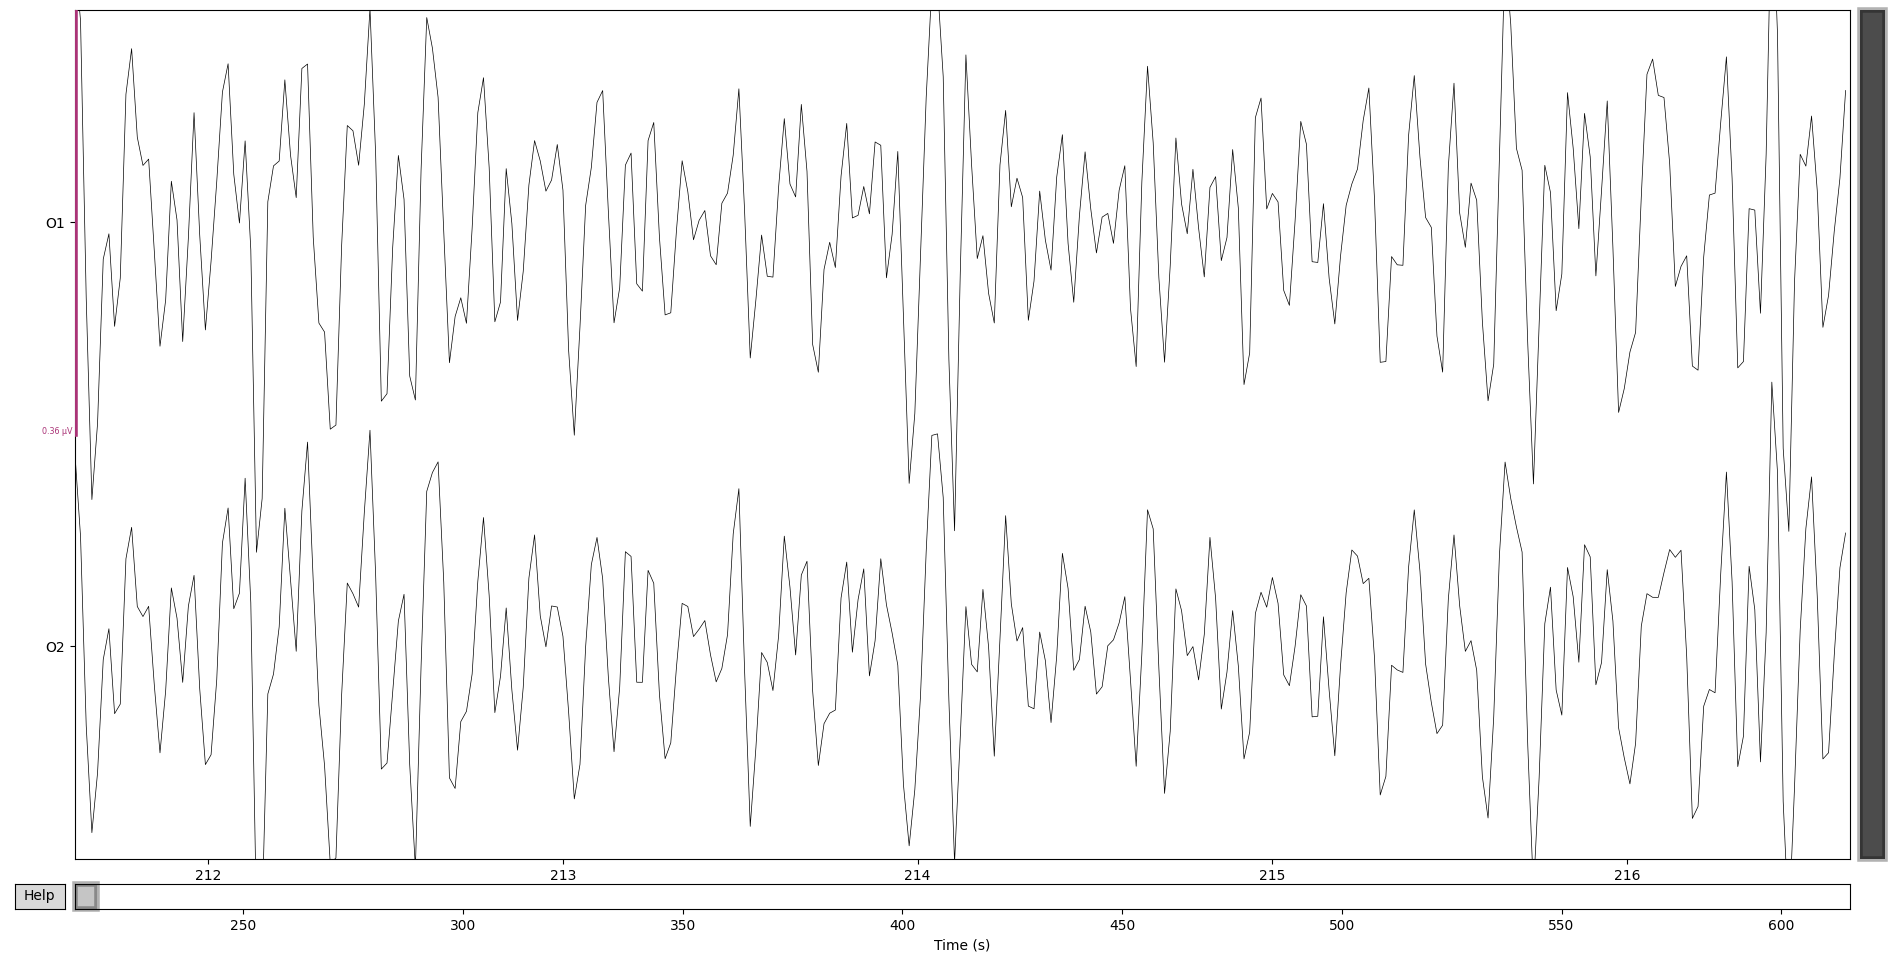

Channels marked as bad:
none


In [10]:
prueba.plot(duration=5.0,show_first_samp=True,scalings='auto',title='EEG SUJETO 1 EXP. BLANCO (SIN PROCESAR)',clipping=None)

In [ ]:
prueba.plot_sensors()


In [11]:
eventos_id = {'6.6 Hz': 1,'7.5 Hz': 2,'8.57 Hz':3,'10 Hz':4,'baseline':5}

In [12]:
muestra_inicial_recorte=int(inicio*250)

In [13]:
etiquetas=[5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 2, 1, 3, 4, 5, 4, 3, 2, 1, 5, 1, 4, 2, 3, 5, 1, 3, 4, 2, 5, 4, 1, 2, 3, 5, 4, 1, 2, 3, 5, 2, 1, 4, 3, 5, 3, 1, 4, 2, 5, 4, 1, 2, 3, 5, 2, 4, 3, 1, 5, 2, 3, 1, 4, 5, 4, 1, 2, 3, 5, 3, 2, 1, 4, 5, 2, 4, 1, 3, 5, 2, 1, 4, 3, 5, 3, 4, 1, 2, 5, 4, 1, 3, 2, 5]

In [14]:
tiempo_estimulo = 4

eventos = [[0+muestra_inicial_recorte,0,5],[875+muestra_inicial_recorte,0,1],[1750+muestra_inicial_recorte,0,2],[2625+muestra_inicial_recorte,0,3],[3500+muestra_inicial_recorte,0,4],[4375+muestra_inicial_recorte,0,5],[5260+muestra_inicial_recorte,0,2],[6125+muestra_inicial_recorte,0,1],[7000+muestra_inicial_recorte,0,4],[7875+muestra_inicial_recorte,0,3],[8750+muestra_inicial_recorte,0,5],[9625+muestra_inicial_recorte,0,3],[10500+muestra_inicial_recorte,0,4],[11375+muestra_inicial_recorte,0,1],[12250+muestra_inicial_recorte,0,2],[13125+muestra_inicial_recorte,0,5],[14000+muestra_inicial_recorte,0,4],[14875+muestra_inicial_recorte,0,1],[15750+muestra_inicial_recorte,0,2],[16625+muestra_inicial_recorte,0,3],[17500+muestra_inicial_recorte,0,5],[18375+muestra_inicial_recorte,0,3],[19250+muestra_inicial_recorte,0,2],[20125+muestra_inicial_recorte,0,4],[21000+muestra_inicial_recorte,0,1],[21875+muestra_inicial_recorte,0,5],[22750+muestra_inicial_recorte,0,4],[23625+muestra_inicial_recorte,0,1],[24500+muestra_inicial_recorte,0,3],[25375+muestra_inicial_recorte,0,2],[26250+muestra_inicial_recorte,0,5],[27125+muestra_inicial_recorte,0,3],[28000+muestra_inicial_recorte,0,1],[28875+muestra_inicial_recorte,0,2],[29750+muestra_inicial_recorte,0,4],[30625+muestra_inicial_recorte,0,5],[31500+muestra_inicial_recorte,0,2],[32375+muestra_inicial_recorte,0,1],[33250+muestra_inicial_recorte,0,3],[34125+muestra_inicial_recorte,0,4],[35000+muestra_inicial_recorte,0,5],[35875+muestra_inicial_recorte,0,4],[36750+muestra_inicial_recorte,0,2],[37625+muestra_inicial_recorte,0,1],[38500+muestra_inicial_recorte,0,3],[39375+muestra_inicial_recorte,0,5],[40250+muestra_inicial_recorte,0,4],[41125+muestra_inicial_recorte,0,1],[42000+muestra_inicial_recorte,0,3],[42875+muestra_inicial_recorte,0,2],[43750+muestra_inicial_recorte,0,5],[44625+muestra_inicial_recorte,0,1],[45500+muestra_inicial_recorte,0,3],[46375+muestra_inicial_recorte,0,4],[47250+muestra_inicial_recorte,0,2],[48125+muestra_inicial_recorte,0,5],[49000+muestra_inicial_recorte,0,4],[49875+muestra_inicial_recorte,0,1],[50750+muestra_inicial_recorte,0,3],[51625+muestra_inicial_recorte,0,2],[52500+muestra_inicial_recorte,0,5],[53375+muestra_inicial_recorte,0,4],[54250+muestra_inicial_recorte,0,3],[55125+muestra_inicial_recorte,0,2],[56000+muestra_inicial_recorte,0,1],[56875+muestra_inicial_recorte,0,5],[57750+muestra_inicial_recorte,0,2],[58625+muestra_inicial_recorte,0,4],[59500+muestra_inicial_recorte,0,3],[60375+muestra_inicial_recorte,0,1],[61250+muestra_inicial_recorte,0,5],[62125+muestra_inicial_recorte,0,1],[63000+muestra_inicial_recorte,0,3],[63875+muestra_inicial_recorte,0,4],[64750+muestra_inicial_recorte,0,2],[65625+muestra_inicial_recorte,0,5],[66500+muestra_inicial_recorte,0,3],[67375+muestra_inicial_recorte,0,4],[68250+muestra_inicial_recorte,0,1],[69125+muestra_inicial_recorte,0,2],[70000+muestra_inicial_recorte,0,5],[70875+muestra_inicial_recorte,0,4],[71750+muestra_inicial_recorte,0,2],[72625+muestra_inicial_recorte,0,3],[73500+muestra_inicial_recorte,0,1],[74375+muestra_inicial_recorte,0,5],[75250+muestra_inicial_recorte,0,2],[76125+muestra_inicial_recorte,0,4],[77000+muestra_inicial_recorte,0,1],[77875+muestra_inicial_recorte,0,3],[78750+muestra_inicial_recorte,0,5],[79625+muestra_inicial_recorte,0,3],[80500+muestra_inicial_recorte,0,4],[81375+muestra_inicial_recorte,0,1],[82250+muestra_inicial_recorte,0,2],[83125+muestra_inicial_recorte,0,5],[84000+muestra_inicial_recorte,0,4],[84875+muestra_inicial_recorte,0,2],[85750+muestra_inicial_recorte,0,1],[86625+muestra_inicial_recorte,0,3],[87500+muestra_inicial_recorte,0,5]]

for indice in range(len(etiquetas)):
    eventos[indice][0]=int((tiempo_estimulo*250*indice)+muestra_inicial_recorte)
    eventos[indice][2]=etiquetas[indice]
        
        
print(eventos)

eventos = np.array(eventos)

[[52906, 0, 5], [53906, 0, 1], [54906, 0, 2], [55906, 0, 3], [56906, 0, 4], [57906, 0, 5], [58906, 0, 1], [59906, 0, 2], [60906, 0, 3], [61906, 0, 4], [62906, 0, 5], [63906, 0, 1], [64906, 0, 2], [65906, 0, 3], [66906, 0, 4], [67906, 0, 5], [68906, 0, 2], [69906, 0, 1], [70906, 0, 3], [71906, 0, 4], [72906, 0, 5], [73906, 0, 4], [74906, 0, 3], [75906, 0, 2], [76906, 0, 1], [77906, 0, 5], [78906, 0, 1], [79906, 0, 4], [80906, 0, 2], [81906, 0, 3], [82906, 0, 5], [83906, 0, 1], [84906, 0, 3], [85906, 0, 4], [86906, 0, 2], [87906, 0, 5], [88906, 0, 4], [89906, 0, 1], [90906, 0, 2], [91906, 0, 3], [92906, 0, 5], [93906, 0, 4], [94906, 0, 1], [95906, 0, 2], [96906, 0, 3], [97906, 0, 5], [98906, 0, 2], [99906, 0, 1], [100906, 0, 4], [101906, 0, 3], [102906, 0, 5], [103906, 0, 3], [104906, 0, 1], [105906, 0, 4], [106906, 0, 2], [107906, 0, 5], [108906, 0, 4], [109906, 0, 1], [110906, 0, 2], [111906, 0, 3], [112906, 0, 5], [113906, 0, 2], [114906, 0, 4], [115906, 0, 3], [116906, 0, 1], [117906

In [33]:
print(eventos)
eventos.shape

[[ 52906      0      5]
 [ 53906      0      1]
 [ 54906      0      2]
 [ 55906      0      3]
 [ 56906      0      4]
 [ 57906      0      5]
 [ 58906      0      1]
 [ 59906      0      2]
 [ 60906      0      3]
 [ 61906      0      4]
 [ 62906      0      5]
 [ 63906      0      1]
 [ 64906      0      2]
 [ 65906      0      3]
 [ 66906      0      4]
 [ 67906      0      5]
 [ 68906      0      2]
 [ 69906      0      1]
 [ 70906      0      3]
 [ 71906      0      4]
 [ 72906      0      5]
 [ 73906      0      4]
 [ 74906      0      3]
 [ 75906      0      2]
 [ 76906      0      1]
 [ 77906      0      5]
 [ 78906      0      1]
 [ 79906      0      4]
 [ 80906      0      2]
 [ 81906      0      3]
 [ 82906      0      5]
 [ 83906      0      1]
 [ 84906      0      3]
 [ 85906      0      4]
 [ 86906      0      2]
 [ 87906      0      5]
 [ 88906      0      4]
 [ 89906      0      1]
 [ 90906      0      2]
 [ 91906      0      3]
 [ 92906      0      5]
 [ 93906      0 

(101, 3)

In [34]:
len(eventos)

101

In [15]:
epocas =mne.Epochs(prueba,eventos,eventos_id,tmin=0,reject = dict(   eeg=20e-6     # unit: V (EEG channels)
                ), tmax=tiempo_estimulo,baseline=None)

Not setting metadata
101 matching events found
No baseline correction applied
0 projection items activated


In [16]:
epocas

Number of events,101
Events,10 Hz: 206.6 Hz: 207.5 Hz: 208.57 Hz: 20baseline: 21
Time range,0.000 – 4.000 sec
Baseline,off


Using data from preloaded Raw for 101 events and 1001 original time points ...
0 bad epochs dropped
Using matplotlib as 2D backend.
Using data from preloaded Raw for 20 events and 1001 original time points ...


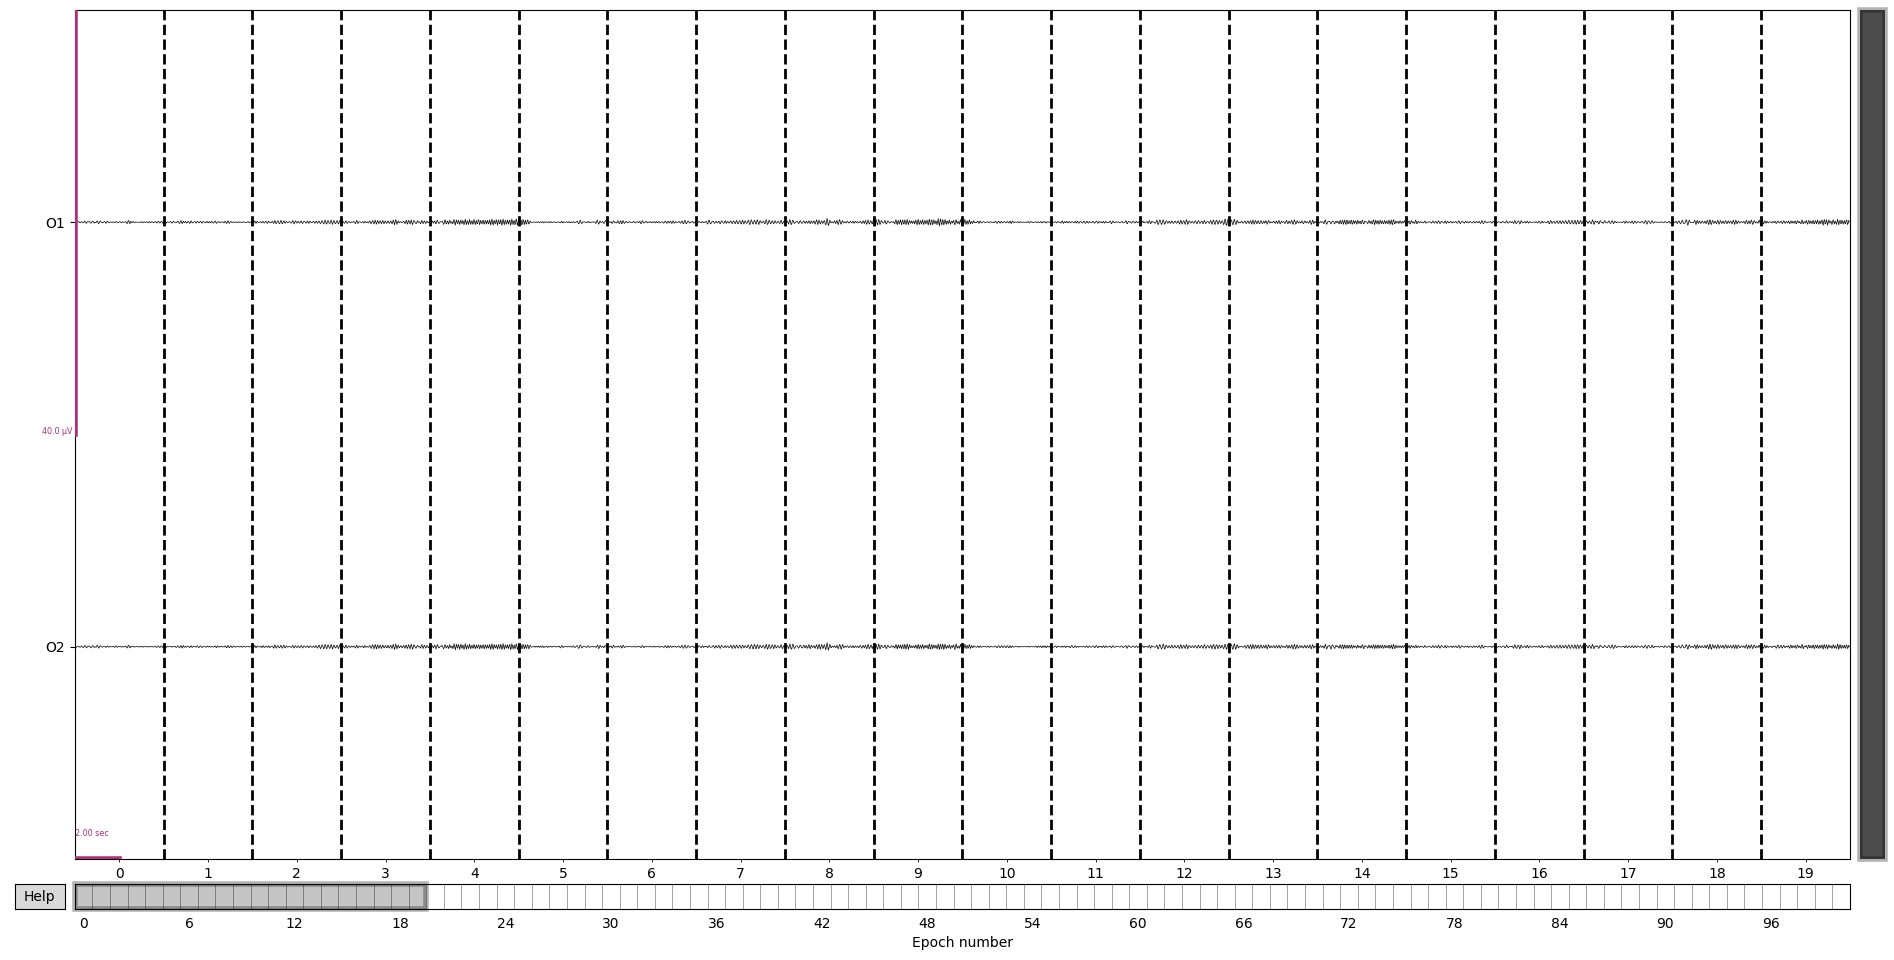

Dropped 0 epochs: 
The following epochs were marked as bad and are dropped:
[]
Channels marked as bad:
none


In [17]:
epocas.plot(events=eventos,event_id=eventos_id)

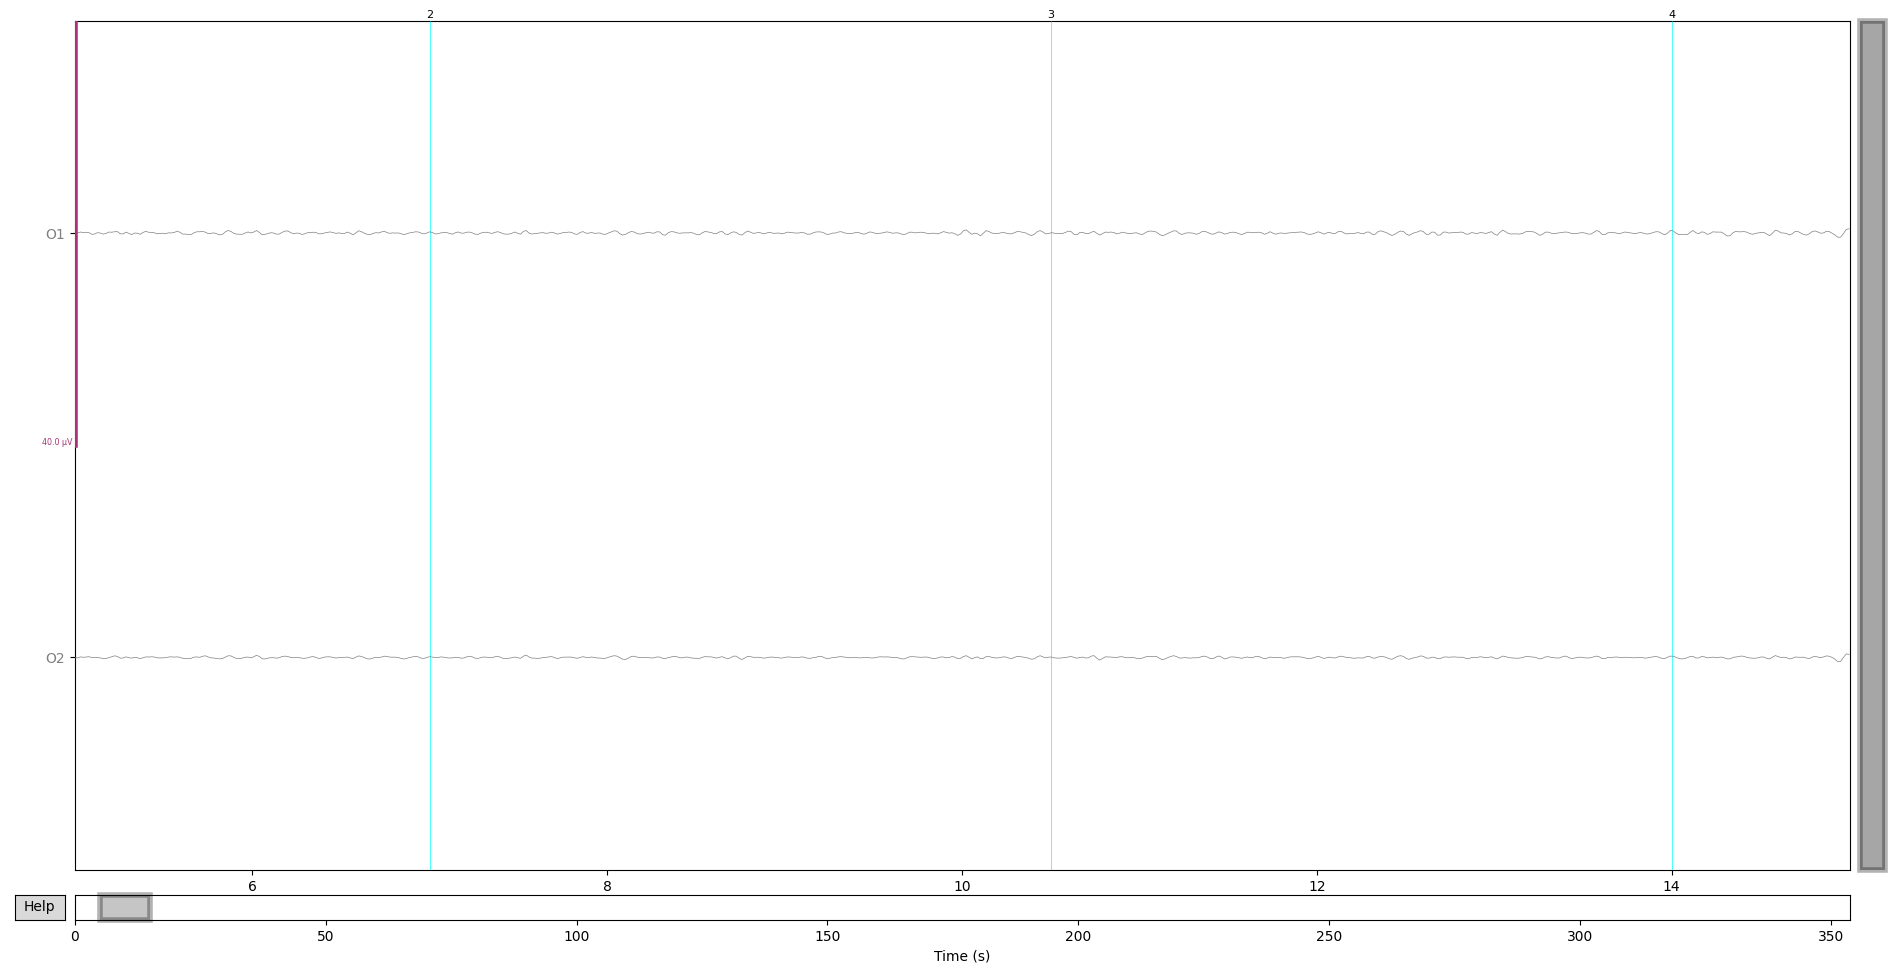

In [62]:
prueba.plot(events=eventos, start=5, duration=10, color='gray')

In [19]:
fig = mne.viz.plot_events(eventos, sfreq=prueba.info['sfreq'],
                          first_samp=prueba.first_samp, event_id=eventos_id)
fig.subplots_adjust(right=0.7)

In [18]:
f6_6 = epocas['6.6 Hz'].average()
f7_5 = epocas['7.5 Hz'].average()
f8_57 = epocas['8.57 Hz'].average()
f10 = epocas['10 Hz'].average()
base = epocas['baseline'].average()

In [19]:
fig1 = f6_6.plot()
fig2 = f7_5.plot()
fig3 = f8_57.plot()
fig4 = f10.plot()

No projector specified for this dataset. Please consider the method self.add_proj.


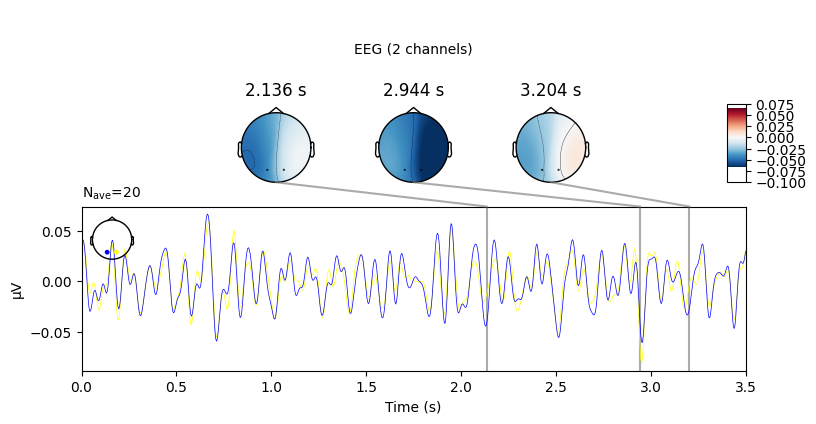

In [100]:
f6_6.plot_joint()

Effective window size : 1.024 (s)


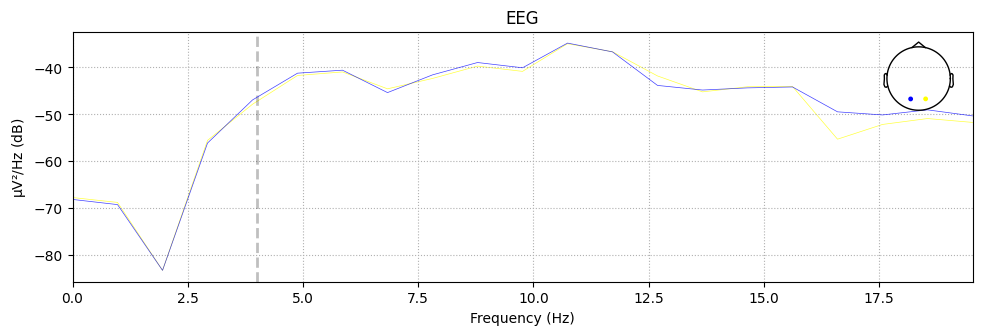

In [32]:
spectrum = mne.time_frequency.Spectrum(f6_6,'welch',0,20,0,3.5,None,False,False,n_jobs=1)
spectrum.plot()

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 1.024 (s)


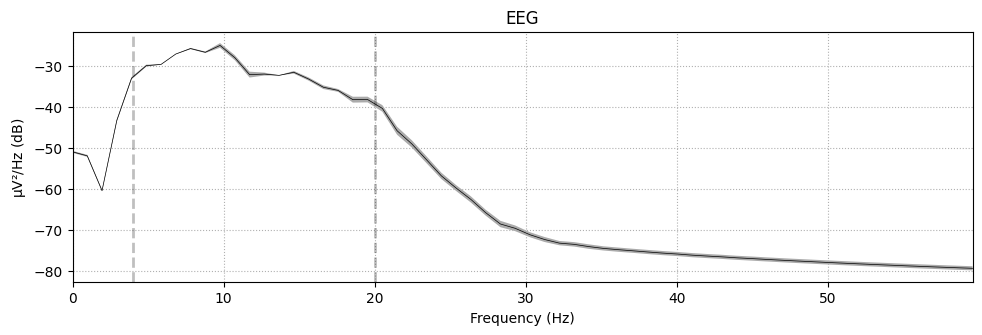

In [18]:
prueba.plot_psd(tmax=np.inf, fmax=60, average=True)

In [18]:
comienzo = 0
termino = 4.000

tmin = comienzo
tmax = termino
fmin = 1.
fmax = 15.
sfreq = epocas.info['sfreq']

spectrum = epocas.compute_psd(
    'welch',
    n_fft=int(sfreq * (tmax - tmin)),
    n_overlap=0, n_per_seg=None,
    tmin=tmin, tmax=tmax,
    fmin=fmin, fmax=fmax,
    window='boxcar',
    verbose=False)
psds, freqs = spectrum.get_data(return_freqs=True)

In [19]:
spectrum

Data type,Power Spectrum
Units,eeg: V²/Hz
Data source,Epochs
Number of epochs,101
Dims,"epoch, channel, freq"
Estimation method,welch
Number of channels,2
Number of frequency bins,57
Frequency range,1.00 – 15.00 Hz


Averaging across epochs...


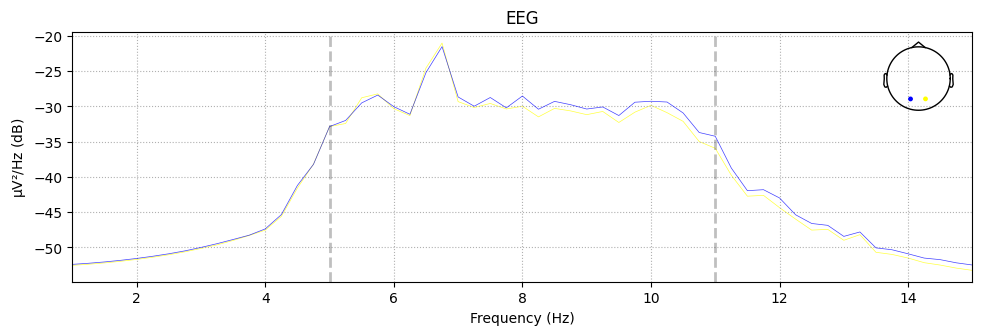

In [20]:
spectrum['6.6 Hz'].plot()

In [20]:
psds.shape

(101, 2, 57)

In [21]:
freqs

array([ 1.  ,  1.25,  1.5 ,  1.75,  2.  ,  2.25,  2.5 ,  2.75,  3.  ,
        3.25,  3.5 ,  3.75,  4.  ,  4.25,  4.5 ,  4.75,  5.  ,  5.25,
        5.5 ,  5.75,  6.  ,  6.25,  6.5 ,  6.75,  7.  ,  7.25,  7.5 ,
        7.75,  8.  ,  8.25,  8.5 ,  8.75,  9.  ,  9.25,  9.5 ,  9.75,
       10.  , 10.25, 10.5 , 10.75, 11.  , 11.25, 11.5 , 11.75, 12.  ,
       12.25, 12.5 , 12.75, 13.  , 13.25, 13.5 , 13.75, 14.  , 14.25,
       14.5 , 14.75, 15.  ])

In [21]:
def snr_spectrum(psd, noise_n_neighbor_freqs=1, noise_skip_neighbor_freqs=1):
    """Compute SNR spectrum from PSD spectrum using convolution.

    Parameters
    ----------
    psd : ndarray, shape ([n_trials, n_channels,] n_frequency_bins)
        Data object containing PSD values. Works with arrays as produced by
        MNE's PSD functions or channel/trial subsets.
    noise_n_neighbor_freqs : int
        Number of neighboring frequencies used to compute noise level.
        increment by one to add one frequency bin ON BOTH SIDES
    noise_skip_neighbor_freqs : int
        set this >=1 if you want to exclude the immediately neighboring
        frequency bins in noise level calculation

    Returns
    -------
    snr : ndarray, shape ([n_trials, n_channels,] n_frequency_bins)
        Array containing SNR for all epochs, channels, frequency bins.
        NaN for frequencies on the edges, that do not have enough neighbors on
        one side to calculate SNR.
    """
    # Construct a kernel that calculates the mean of the neighboring
    # frequencies
    averaging_kernel = np.concatenate((
        np.ones(noise_n_neighbor_freqs),
        np.zeros(2 * noise_skip_neighbor_freqs + 1),
        np.ones(noise_n_neighbor_freqs)))
    averaging_kernel /= averaging_kernel.sum()

    # Calculate the mean of the neighboring frequencies by convolving with the
    # averaging kernel.
    mean_noise = np.apply_along_axis(
        lambda psd_: np.convolve(psd_, averaging_kernel, mode='valid'),
        axis=-1, arr=psd
    )

    # The mean is not defined on the edges so we will pad it with nas. The
    # padding needs to be done for the last dimension only so we set it to
    # (0, 0) for the other ones.
    edge_width = noise_n_neighbor_freqs + noise_skip_neighbor_freqs
    pad_width = [(0, 0)] * (mean_noise.ndim - 1) + [(edge_width, edge_width)]
    mean_noise = np.pad(
        mean_noise, pad_width=pad_width, constant_values=np.nan
    )

    return psd / mean_noise

In [22]:
snrs = snr_spectrum(psds, noise_n_neighbor_freqs=3,
                    noise_skip_neighbor_freqs=1)

In [23]:
snrs

array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       ...,

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])

In [27]:
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel

In [25]:
 #psds_plot

In [28]:
fig, axes = plt.subplots(2, 1, sharex='all', sharey='none', figsize=(8, 5))
freq_range = range(np.where(np.floor(freqs) == 4)[0][0],
                   np.where(np.ceil(freqs) == fmax - 1)[0][0])

psds_plot = 10 * np.log10(psds)
psds_mean = psds_plot.mean(axis=(0,1))[freq_range]
psds_std = psds_plot.std(axis=(0,1))[freq_range]
axes[0].plot(freqs[freq_range], psds_mean, color='b')
axes[0].fill_between(
    freqs[freq_range], psds_mean - psds_std, psds_mean + psds_std,
    color='b', alpha=.2)
axes[0].set(title="PSD spectrum", ylabel='Power Spectral Density [dB]')

# SNR spectrum
snr_mean = snrs.mean(axis=(0,1))[freq_range]
snr_std = snrs.std(axis=(0,1))[freq_range]

axes[1].plot(freqs[freq_range], snr_mean, color='r')
axes[1].fill_between(
    freqs[freq_range], snr_mean - snr_std, snr_mean + snr_std,
    color='r', alpha=.2)
axes[1].set(
    title="SNR spectrum", xlabel='Frequency [Hz]',
    ylabel='SNR', ylim=[-2, 30], xlim=[fmin, fmax])
fig.show()

# PRUEBA EXTRACCION DE FEATURES


In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [33]:
import mne_features
mne_features.univariate.get_univariate_funcs(128)

data = epocas.get_data()
labels1 = epocas.events[:, -1]
y1 = labels1

selected_funcs = {'max_cross_corr',
 'nonlin_interdep',
 'phase_lock_val',
 'spect_corr',
 'time_corr',
 'app_entropy',
 'decorr_time',
 'hurst_exp',
 'katz_fd',
 'kurtosis',
 'line_length',
 'mean',
 'samp_entropy',
 'skewness',
 'spect_edge_freq',
 'spect_entropy',
 'spect_slope',
 'std',
 'svd_entropy',
 'svd_fisher_info',
 'teager_kaiser_energy',
 'variance',
 'wavelet_coef_energy',
 'zero_crossings'}
X_new = mne_features.feature_extraction.extract_features(data, 250, selected_funcs)

from sklearn.model_selection import train_test_split

X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X_new, y1, test_size=0.25, random_state=42)

Using data from preloaded Raw for 101 events and 1001 original time points ...


In [62]:
from sklearn.multiclass import OneVsOneClassifier

from sklearn import tree
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

pipeL = make_pipeline(StandardScaler(),
                    #OneVsOneClassifier(LinearSVC(random_state=42,class_weight='balanced'))) #76.92
                    #tree.DecisionTreeClassifier()) #46.15
                    #RandomForestClassifier(random_state=42)) #76.92
                    #BinaryRelevance(GaussianNB()))#69.23
                    #LogisticRegression())#80.7
                    #LogisticRegression(penalty='l1', solver='liblinear',multi_class='auto'))#73.08
                    #LinearSVC(random_state=42))#80.77
                    #OneVsOneClassifier(RandomForestClassifier(random_state=42)))#76.92
                    

pipeL.fit(X_train1,Y_train1)
#print("Accuracy de entrenamiento:", pipeL.score(X_test1, Y_test1))

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('binaryrelevance',
                 BinaryRelevance(classifier=GaussianNB(),
                                 require_dense=[True, True]))])

In [1]:
predictions = pipeL.predict(X_test1).toarray()

from sklearn.metrics import accuracy_score
accuracy_score(Y_test1,predictions)

NameError: name 'pipeL' is not defined

In [36]:
from sklearn.ensemble import RandomForestClassifier
# Random Forest Classifier
rf=RandomForestClassifier(random_state=42)
score_rf = np.mean(cross_val_score(rf,  X_test1, Y_test1, scoring='accuracy'))
rf.fit(X_train1, Y_train1)
print("Accuracy for RandomForest: %s" % '{:.2%}'.format(score_rf))

C:\Users\jarv_\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Accuracy for RandomForest: 62.67%


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test1,predictions)

In [38]:
from sklearn import svm
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
rbf = svm.SVC(kernel='rbf', gamma=1, C=0.001).fit(X_train1, Y_train1)
poly = svm.SVC(decision_function_shape='ovo').fit(X_train1, Y_train1)
poly_pred = poly.predict(X_test1)
rbf_pred = rbf.predict(X_test1)
poly_accuracy = accuracy_score(Y_test1, poly_pred)
poly_f1 = f1_score(Y_test1, poly_pred, average='weighted')
print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy*100))
print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f1*100))

Accuracy (Polynomial Kernel):  19.23
F1 (Polynomial Kernel):  6.26


In [39]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [40]:
logit = LogisticRegression()
logit.fit(X_train1, Y_train1)
Y_pred = logit.predict(X_test1)

C:\Users\jarv_\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [41]:
print("Intercept:", logit.intercept_)
print("Coeficiente:", list(zip(pd.DataFrame(X_new).columns, logit.coef_.flatten(), )))
print("Accuracy de entrenamiento:", logit.score(X_test1, Y_test1))

Intercept: [ 0.09050682  0.0864206  -0.04060156 -0.14439918  0.00807332]
Coeficiente: [(0, 0.027348013356244285), (1, -0.04832563481834438), (2, -1.9829936215432602e-08), (3, -1.9444508754484706e-08), (4, 0.24043343716586543), (5, 0.2883167298897134), (6, -5.5123914019629725e-15), (7, -4.752954820160768e-15), (8, -0.26190747978648876), (9, -0.028759730684009423), (10, 0.026771600472055724), (11, -1.8468904875657185e-16), (12, 3.1609380929677397e-15), (13, 7.182104925459767e-14), (14, -4.273524807729914e-12), (15, -2.206789264517546e-12), (16, 4.6458871751086414e-14), (17, -1.4352980660628067e-16), (18, 1.7533999504180255e-15), (19, 2.862244454545165e-14), (20, -4.039901468690176e-12), (21, -1.6645737558983535e-12), (22, -5.38955133368381e-14), (23, 0.028757840996153253), (24, -4.124677008316354e-09), (25, -3.990688837968369e-09), (26, 0.0740068329091579), (27, 0.08926687510507018), (28, 1.8511179313274053e-10), (29, 1.5769783530290207e-10), (30, 0.0760877669268415), (31, -0.03879785045

In [42]:
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB

# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
classifier = BinaryRelevance(GaussianNB())


# train
classifier.fit(X_train1, Y_train1)

BinaryRelevance(classifier=GaussianNB(), require_dense=[True, True])

In [43]:
predictions = classifier.predict(X_test1)

In [46]:
predictions=predictions.toarray()

In [47]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test1,predictions)

0.6923076923076923

In [ ]:
OneVsOneClassifier(tree.DecisionTreeClassifier())

In [ ]:
epocas._data

In [60]:
X = np.moveaxis(epocas._data[:,pick_types(epocas.info,eeg=True,eog=False,stim=False),:],1,2);
print(x)

TypeError: 'NoneType' object is not subscriptable

In [ ]:
from numpy.random import seed
seed(1017)
import tensorflow as tf
tf.random.set_seed(1017)

import os
from glob import glob
from collections import OrderedDict

import mne
from mne.io import RawArray
from mne import read_evokeds, read_source_spaces, compute_covariance
from mne import channels, find_events, concatenate_raws
from mne import pick_types, viz, io, Epochs, create_info
from mne import pick_channels, concatenate_epochs
from mne.datasets import sample

from mne.time_frequency import tfr_morlet

import numpy as np
from numpy import genfromtxt

import pandas as pd
pd.options.display.precision = 4
pd.options.display.max_columns = None

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (14,14)

import keras
from keras import regularizers
from keras.callbacks import TensorBoard
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Input
from keras.layers import Flatten, Conv2D, MaxPooling2D, LSTM
from keras.layers import BatchNormalization, Conv3D, MaxPooling3D
from tensorflow.keras.utils import to_categorical

from sklearn.utils import class_weight
from sklearn.model_selection import train_test_split

from tensorflow.keras.optimizers import SGD #NUEVA PRUEBA


class Feats:
  def __init__(self, num_classes=2, class_weights=[0.2,0.2,0.2,0.2,0.2], input_shape=[16,], 
               new_times=1, model_type='1', 
               x_train=1, y_train=1, x_test=1, y_test=1, x_val=1, y_val=1):
    self.num_classes = num_classes
    self.class_weights = class_weights
    self.input_shape = input_shape
    self.new_times = new_times
    self.model_type = model_type
    self.x_train = x_train
    self.y_train = y_train
    self.x_test = x_test
    self.y_test = y_test
    self.x_val = x_val
    self.y_val = y_val



def FeatureEngineer(epochs, model_type='NN',
                    frequency_domain=False,
                    normalization=False, electrode_median=False,
                    wavelet_decim=1, flims=(3,30), include_phase=False,
                    f_bins=20, wave_cycles=3, 
                    wavelet_electrodes = [11,12,13,14,15],
                    spect_baseline=[-1,-.5],
                    test_split = 0.2, val_split = 0.2,
                    random_seed=1017, watermark = False):
    """
    Takes epochs object as 

  input and settings, 
  outputs  feats(training, test and val data option to use frequency or time domain)
  
  TODO: take tfr? or autoencoder encoded object?

  FeatureEngineer(epochs, model_type='NN',
                    frequency_domain=False,
                    normalization=False, electrode_median=False,
                    wavelet_decim=1, flims=(3,30), include_phase=False,
                    f_bins=20, wave_cycles=3, 
                    wavelet_electrodes = [11,12,13,14,15],
                    spect_baseline=[-1,-.5],
                    test_split = 0.2, val_split = 0.2,
                    random_seed=1017, watermark = False):
    """
    np.random.seed(random_seed)

  #pull event names in order of trigger number
    epochs.event_id = {'cond0':1, 'cond1':2,'cond2':3,'cond3':4,'cond4':5}
    event_names = ['cond0','cond1','cond2','cond3','cond4']
    """i = 0
  for key, value in sorted(epochs.event_id.items(), key=lambda item: (item[1],item[0])):
    event_names[i] = key
    i += 1"""

    #Create feats object for output
    feats = Feats()
    feats.num_classes = len(epochs.event_id)
    feats.model_type = model_type

    if frequency_domain:
        print('Constructing Frequency Domain Features')
        #list of frequencies to output
        f_low = flims[0]
        f_high = flims[1]
        frequencies =  np.linspace(f_low, f_high, f_bins, endpoint=True)

        #option to select all electrodes for fft
        if wavelet_electrodes == 'all':
            wavelet_electrodes = pick_types(epochs.info,eeg=True,eog=False)

        #type of output from wavelet analysis
        if include_phase:
            tfr_output_type = 'complex'
        else:
            tfr_output_type = 'power'

        tfr_dict = {}
        
        for event in event_names:
            print('Computing Morlet Wavelets on ' + event)
            tfr_temp = tfr_morlet(epochs[event], freqs=frequencies,
                            n_cycles=wave_cycles, return_itc=False,
                            picks=wavelet_electrodes, average=False,
                            decim=wavelet_decim, output=tfr_output_type)
            # Apply spectral baseline and find stim onset time
            #tfr_temp = tfr_temp.apply_baseline(spect_baseline,mode='mean')
            stim_onset = np.argmax(tfr_temp.times>0)

            # Reshape power output and save to tfr dict
            power_out_temp = np.moveaxis(tfr_temp.data[:,:,:,stim_onset:],1,3)
            power_out_temp = np.moveaxis(power_out_temp,1,2)
            print(event + ' trials: ' + str(len(power_out_temp)))
            tfr_dict[event] = power_out_temp

        #reshape times (sloppy but just use the last temp tfr)
        feats.new_times = tfr_temp.times[stim_onset:]

        for event in event_names:
            print(event + ' Time Points: ' + str(len(feats.new_times)))
            print(event + ' Frequencies: ' + str(len(tfr_temp.freqs)))

        #Construct X and Y
        for ievent,event in enumerate(event_names):
            if ievent == 0:
                X = tfr_dict[event]
                Y_class = np.zeros(len(tfr_dict[event]))
            else:
                X = np.append(X,tfr_dict[event],0)
                Y_class = np.append(Y_class,np.ones(len(tfr_dict[event]))*ievent,0)

        #concatenate real and imaginary data
        if include_phase:
            print('Concatenating the real and imaginary components')
            X = np.append(np.real(X),np.imag(X),2)

        #compute median over electrodes to decrease features
        if electrode_median:
            print('Computing Median over electrodes')
            X = np.expand_dims(np.median(X,axis=len(X.shape)-1),2)

        #reshape for various models
        if model_type == 'NN' or model_type == 'LSTM':
            X = np.reshape(X, (X.shape[0], X.shape[1], np.prod(X.shape[2:])))

        if model_type == 'CNN3D':
            X = np.expand_dims(X,4)
        
        if model_type == 'AUTO' or model_type == 'AUTODeep':
            print('Auto model reshape')
            X = np.reshape(X, (X.shape[0],np.prod(X.shape[1:])))


    if not frequency_domain:#este es el que nos sirve
        print('Constructing Time Domain Features')
        
        #if using muse aux port as eeg must label it as such
        eeg_chans = pick_types(epochs.info,eeg=True,eog=False,stim=False)

        #put channels last, remove eye and stim
        X = np.moveaxis(epochs._data[:,eeg_chans,:],1,2);

        #take post baseline only
        stim_onset = np.argmax(epochs.times>0)
        feats.new_times = epochs.times[stim_onset:]
        X = X[:,stim_onset:,:]

        #convert markers to class
        #requires markers to be 1 and 2 in data file?
        #This probably is not robust to other marker numbers
        Y_class = epochs.events[:,2]-1  #subtract 1 

        #median over electrodes to reduce features
        if electrode_median:
            print('Computing Median over electrodes')
            X = np.expand_dims(np.median(X,axis=len(X.shape)-1),2)

        ## Model Reshapes:
        # reshape for CNN
        if model_type == 'CNN':
            print('Size X before reshape for CNN: ' + str(X.shape))
            X = np.expand_dims(X,3 )
            print('Size X before reshape for CNN: ' + str(X.shape))

        # reshape for CNN3D
        if model_type == 'CNN3D':
            print('Size X before reshape for CNN3D: ' + str(X.shape))
            X = np.expand_dims(np.expand_dims(X,3),4)
            print('Size X before reshape for CNN3D: ' + str(X.shape))

        #reshape for autoencoder
        if model_type == 'AUTO' or model_type == 'AUTODeep':
            print('Size X before reshape for Auto: ' + str(X.shape))
            X = np.reshape(X, (X.shape[0], np.prod(X.shape[1:])))
            print('Size X after reshape for Auto: ' + str(X.shape))


    #Normalize X - TODO: need to save mean and std for future test + val
    if normalization:
        print('Normalizing X')
        X = (X - np.mean(X)) / np.std(X)

    # convert class vectors to one hot Y and recast X
    Y = to_categorical(Y_class,feats.num_classes)
    X = X.astype('float32')

    # add watermark for testing models
    if watermark:
        X[Y[:,0]==0,0:2,] = 0
        X[Y[:,0]==1,0:2,] = 1

    # Compute model input shape
    feats.input_shape = X.shape[1:]

    # Split training test and validation data
    val_prop = val_split / (1-test_split)
    (feats.x_train,
    feats.x_test,
    feats.y_train,
    feats.y_test) = train_test_split(X, Y,
                                     test_size=test_split,
                                     random_state=42) # SE CAMBIO random_seed x 42
    (feats.x_train,
    feats.x_val,
    feats.y_train,
    feats.y_val) = train_test_split(feats.x_train, feats.y_train,
                                   test_size=val_prop,
                                   random_state=42) # SE CAMBIO random_seed x 42

    #compute class weights for uneven classes
    #y_ints = [y.argmax() for y in feats.y_train]
    #feats.class_weights = class_weight.compute_class_weight('balanced',
     #                                            np.unique(y_ints),
      #                                           y_ints)
  
  
  
    #Print some outputs
    print('Combined X Shape: ' + str(X.shape))
    print('Combined Y Shape: ' + str(Y_class.shape))
    print('Y Example (should be 1s & 0s): ' + str(Y_class[0:10]))
    print('X Range: ' + str(np.min(X)) + ':' + str(np.max(X)))
    print('Input Shape: ' + str(feats.input_shape))
    print('x_train shape:', feats.x_train.shape)
    print(feats.x_train.shape[0], 'train samples')
    print(feats.x_test.shape[0], 'test samples')
    print(feats.x_val.shape[0], 'validation samples')
    print('Class Weights: ' + str(feats.class_weights))
 
    feats.class_weights = dict(enumerate(feats.class_weights))#Configuracion realizada para la clasifiacion multiclase


    return feats





def CreateModel(feats,units=[32,16,8,8,4,8,16], dropout=.3,  #cambié el dropout de .25 a .3
                batch_norm=True, filt_size=3, pool_size=2):
    
    print('Creating ' +  feats.model_type + ' Model')
    print('Input shape: ' + str(feats.input_shape))
    
    nunits = len(units)

    ##---LSTM - Many to two, sequence of time to classes
    #Units must be at least two
    if feats.model_type == 'LSTM':
        if nunits < 2:
            print('Warning: Need at least two layers for LSTM')
            
        model = Sequential()
        model.add(LSTM(input_shape=(None, feats.input_shape[1]),
                   units=units[0], return_sequences=True))
        
        
        if batch_norm:
            model.add(BatchNormalization())
        model.add(Activation('relu'))
        
        if dropout:
            model.add(Dropout(dropout))

        if len(units) > 2:
            for unit in units[1:-1]:
                model.add(LSTM(units=unit,return_sequences=True))
                
                if batch_norm:
                    model.add(BatchNormalization())
                model.add(Activation('relu'))
            
                if dropout:
                    model.add(Dropout(dropout))

        model.add(LSTM(units=units[-1],return_sequences=False))
        if batch_norm:
            model.add(BatchNormalization())
        model.add(Activation('relu'))
        if dropout:
            model.add(Dropout(dropout))

        model.add(Dense(units=feats.num_classes))
        model.add(Activation("softmax"))

        
                
    ##---DenseFeedforward Network
    #Makes a hidden layer for each item in units
    if feats.model_type == 'NN':
        
        model = Sequential()
        model.add(Flatten(input_shape=feats.input_shape))
        
        for unit in units:
            model.add(Dense(unit))
            if batch_norm:
                model.add(BatchNormalization())
            model.add(Activation('relu'))
            if dropout:
                model.add(Dropout(dropout))

        model.add(Dense(feats.num_classes, activation='softmax'))

    ##----Convolutional Network
    if feats.model_type == 'CNN':
        if nunits < 2:
            print('Warning: Need at least two layers for CNN')
        model = Sequential()
        model.add(Conv2D(units[0], filt_size,
              input_shape=feats.input_shape, padding='same'))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size=pool_size, padding='same'))
        
        if nunits > 2:
            for unit in units[1:-1]:
                model.add(Conv2D(unit, filt_size, padding='same'))
                model.add(Activation('relu'))
                model.add(MaxPooling2D(pool_size=pool_size, padding='same'))

        model.add(Flatten())
        model.add(Dense(units[-1]))
        model.add(Activation('relu'))
        model.add(Dense(feats.num_classes))
        model.add(Activation('softmax'))

    ##----Convolutional Network
    if feats.model_type == 'CNN3D':
        if nunits < 2:
            print('Warning: Need at least two layers for CNN')
        model = Sequential()
        model.add(Conv3D(units[0], filt_size,
                     input_shape=feats.input_shape, padding='same'))
        model.add(Activation('relu'))
        model.add(MaxPooling3D(pool_size=pool_size, padding='same'))

        if nunits > 2:
            for unit in units[1:-1]:
                model.add(Conv3D(unit, filt_size, padding='same'))
                model.add(Activation('relu'))
                model.add(MaxPooling3D(pool_size=pool_size, padding='same'))


        model.add(Flatten())
        model.add(Dense(units[-1]))
        model.add(Activation('relu'))
        model.add(Dense(feats.num_classes))
        model.add(Activation('softmax'))


    ## Autoencoder
    #takes the first item in units for hidden layer size
    if feats.model_type == 'AUTO':
        encoding_dim = units[0]
        input_data = Input(shape=(feats.input_shape[0],))
        #,activity_regularizer=regularizers.l1(10e-5)
        encoded = Dense(encoding_dim, activation='relu')(input_data)
        decoded = Dense(feats.input_shape[0], activation='sigmoid')(encoded)
        model = Model(input_data, decoded)
        
        encoder = Model(input_data,encoded)
        encoded_input = Input(shape=(encoding_dim,))
        decoder_layer = model.layers[-1]
        decoder = Model(encoded_input, decoder_layer(encoded_input))


    #takes an odd number of layers > 1
    #e.g. units = [64,32,16,32,64]
    if feats.model_type == 'AUTODeep':
        if nunits % 2 == 0:
            print('Warning: Please enter odd number of layers into units')

        half = nunits/2
        midi = int(np.floor(half))

        input_data = Input(shape=(feats.input_shape[0],))
        encoded = Dense(units[0], activation='relu')(input_data)

        #encoder decreases
        if nunits >= 3:
            for unit in units[1:midi]:
                encoded = Dense(unit, activation='relu')(encoded)

        #latent space
        decoded = Dense(units[midi], activation='relu')(encoded)

        #decoder increses
        if nunits >= 3:
            for unit in units[midi+1:-1]:
                decoded = Dense(unit, activation='relu')(decoded)

        decoded = Dense(units[-1], activation='relu')(decoded)

        decoded = Dense(feats.input_shape[0], activation='sigmoid')(decoded)
        model = Model(input_data, decoded)

        encoder = Model(input_data,encoded)
        encoded_input = Input(shape=(units[midi],))

    


    if feats.model_type == 'AUTO' or feats.model_type == 'AUTODeep':
        opt = tf.keras.optimizers.Adam(lear=0.001, beta_1=0.9, beta_2=0.999, 
                                       epsilon=0.0000001, decay=0.0, amsgrad=False)#lr=0.001
        model.compile(optimizer=opt, loss='mean_squared_error')



    if ((feats.model_type == 'CNN') or
      (feats.model_type == 'CNN3D') or
      (feats.model_type == 'LSTM') or
      (feats.model_type == 'NN')):
        
        # initiate adam optimizer
        opt =  tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999,epsilon=0.0000001, amsgrad=False) #lr=0.001 
        ##SGD(lr=0.0001, momentum=0.9)#
        # Let's train the model using RMSprop
        model.compile(loss='categorical_crossentropy',
                  optimizer=opt,# se cambio opt por 'adam'
                  metrics=['accuracy'])
        encoder = []


    model.summary()

    return model, encoder





def TrainTestVal(model, feats, batch_size=2, 
                train_epochs=20, show_plots=True):
    
    print('Training Model:')
    # Train Model
    
    if feats.model_type == 'AUTO' or feats.model_type == 'AUTODeep':
        print('Training autoencoder:')
        
        history = model.fit(feats.x_train, feats.x_train,
                        batch_size = batch_size,
                        epochs=train_epochs,
                        validation_data=(feats.x_val,feats.x_val),
                        shuffle=True,
                        verbose=True,
                        class_weight=feats.class_weights
                       )
        
        #Cambiar el class weight = none por = feats.class_weights
        
        # list all data in history
        print(history.history.keys())
        
        if show_plots:
            # summarize history for loss
            plt.semilogy(history.history['loss'])
            plt.semilogy(history.history['val_loss'])
            plt.title('model loss')
            plt.ylabel('loss')
            plt.xlabel('epoch')
            plt.legend(['train', 'val'], loc='upper left')
            plt.show()
        
    else:
        history = model.fit(feats.x_train, feats.y_train, batch_size=batch_size, 
                                epochs=train_epochs, validation_data=(feats.x_val, feats.y_val),shuffle=True,verbose=True,class_weight=feats.class_weights)
        #Cambiar el class weight = none por = feats.class_weight
        
        # list all data in history
        print(history.history.keys())
        
        if show_plots:
            # summarize history for accuracy
            plt. clf()
            plt.plot(history.history['accuracy'])
            plt.plot(history.history['val_accuracy'])
            plt.title('model accuracy')
            plt.ylabel('accuracy')
            plt.xlabel('epoch')
            plt.legend(['train', 'val'], loc='upper left')
            plt.show()
            
            """
      # summarize history for loss
      plt.semilogy(history.history['loss'])
      plt.semilogy(history.history['val_loss'])
      plt.title('model loss')
      plt.ylabel('loss')
      plt.xlabel('epoch')
      plt.legend(['train', 'val'], loc='upper left')
      plt.show()"""


    # Te1st on left out Test data
        score, acc = model.evaluate(feats.x_test, feats.y_test,
                                batch_size=batch_size)
        print(model.metrics_names)
        print('Test loss:', score)
        print('Test accuracy:', acc)

        # Build a dictionary of data to return
        data = {}
        data['score'] = score
        data['acc'] = acc

        return model, data

In [51]:
features_DEEP = FeatureEngineer(epocas, model_type='NN',
                    frequency_domain=True,
                    normalization=True, electrode_median=True,
                    wavelet_decim=1, flims=(4,20), include_phase=False,
                    f_bins=49, wave_cycles=3, 
                    wavelet_electrodes = 'all',
                    test_split = 0.2, val_split = 0.2,
                    random_seed=42, watermark = False)

Constructing Frequency Domain Features
Computing Morlet Wavelets on cond0
Using data from preloaded Raw for 20 events and 1001 original time points ...
Not setting metadata


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s finished


cond0 trials: 20
Computing Morlet Wavelets on cond1
Using data from preloaded Raw for 20 events and 1001 original time points ...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Not setting metadata
cond1 trials: 20
Computing Morlet Wavelets on cond2
Using data from preloaded Raw for 20 events and 1001 original time points ...
Not setting metadata


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s finished


cond2 trials: 20
Computing Morlet Wavelets on cond3
Using data from preloaded Raw for 20 events and 1001 original time points ...
Not setting metadata


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s finished


cond3 trials: 20
Computing Morlet Wavelets on cond4
Using data from preloaded Raw for 21 events and 1001 original time points ...
Not setting metadata


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s finished


cond4 trials: 21
cond0 Time Points: 1000
cond0 Frequencies: 49
cond1 Time Points: 1000
cond1 Frequencies: 49
cond2 Time Points: 1000
cond2 Frequencies: 49
cond3 Time Points: 1000
cond3 Frequencies: 49
cond4 Time Points: 1000
cond4 Frequencies: 49
Computing Median over electrodes
Normalizing X
Combined X Shape: (101, 1000, 49)
Combined Y Shape: (101,)
Y Example (should be 1s & 0s): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
X Range: -0.77186805:17.594185
Input Shape: (1000, 49)
x_train shape: (60, 1000, 49)
60 train samples
21 test samples
20 validation samples
Class Weights: [0.2, 0.2, 0.2, 0.2, 0.2]


In [ ]:
Flatten(input_shape=features_DEEP.input_shape)

In [ ]:
modelo, _ = CreateModel(features_DEEP)

In [ ]:
TrainTestVal(modelo, features_DEEP,train_epochs=150,batch_size=64)